# Теория. Общая информация об алгоритме

### Типы задач
Y - множество ответов
- ### Классификация (Classification)

    Y = {0, 1} - Бинарная классификация

    Y = {1, 2, ..., n} - Многоклассовая классификация

    Y = {0, 1}^n - Многометочная классификация (Каждый объект может принадлежать нескольким классам одновременно)
- ### Регрессия (Regression)

    Y = R
- ### Ранжирование (Ranking)

    Y = {1, 2, ..., n} (числа упорядочены)

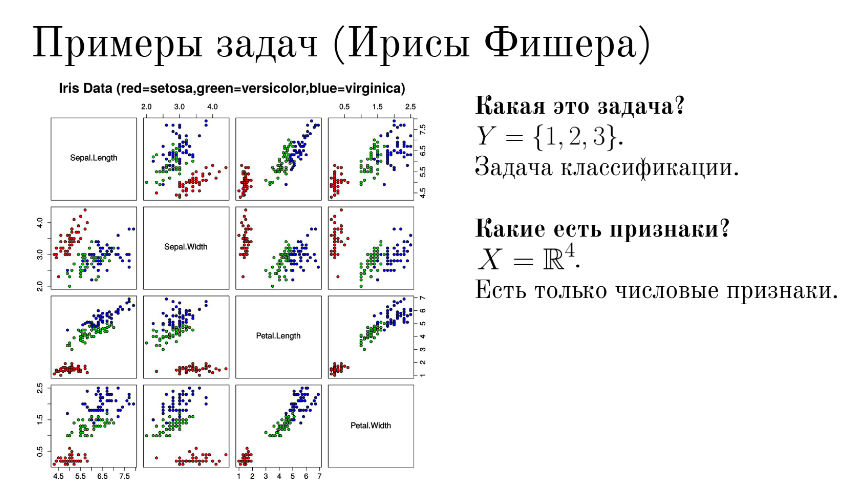

## K-Nearest Neighbors (Решение задачи классификации)
#### Обучение: 
Просто запоминаем обучающую выборку
#### Предсказание:
- Получаем точку х, в которой надо сделать предсказание
- Ищем k ближайших соседей
- В качестве ответа возвращаем класс, которого больше всего среди соседей

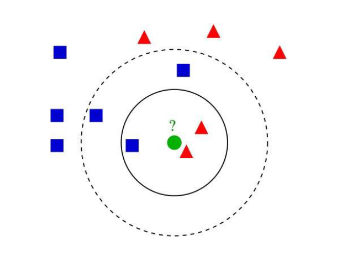

### Проблемы алгоритма:
### 1) Curse of Dimensionality

В KNN мы делаем очень слабое предположение: близкие точки будут иметь близкие ответы

С увеличением количества размерности данные становятся чрезвычайно разреженными и в близкую область попадает мало объектов

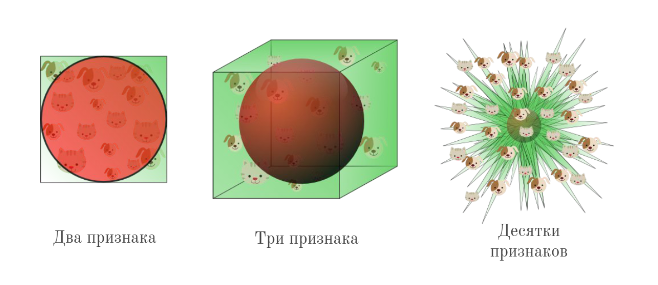

### 2) Feature Scale

Если в качестве метрики взять обычное расстояние между векторами, то возникает проблема масштаба признаков

Feature Scaling — это процесс приведения числовых признаков (features) в наборе данных к единому масштабу (диапазону значений). Делается это до обучения модели.

#### Проблема, которую решает масштабирование:

Представьте себе набор данных о людях, где есть два признака:

Зарплата (руб): от 50 000 до 500 000

Возраст (лет): от 18 до 80

Разброс значений у зарплаты в тысячи раз больше, чем у возраста. Для многих алгоритмов машинного обучения (особенно тех, что основаны на вычислении расстояний или градиентном спуске) это создаст проблему: модель будет считать признак "Зарплата" гораздо более важным просто потому, что его численные значения больше. Масштабирование "уравнивает" признаки, лишая их исходных единиц измерения.

### Переобучение
Переобучение - это ситуация, когда качество модели на train данных значительно лучше, чем на validation/test данных

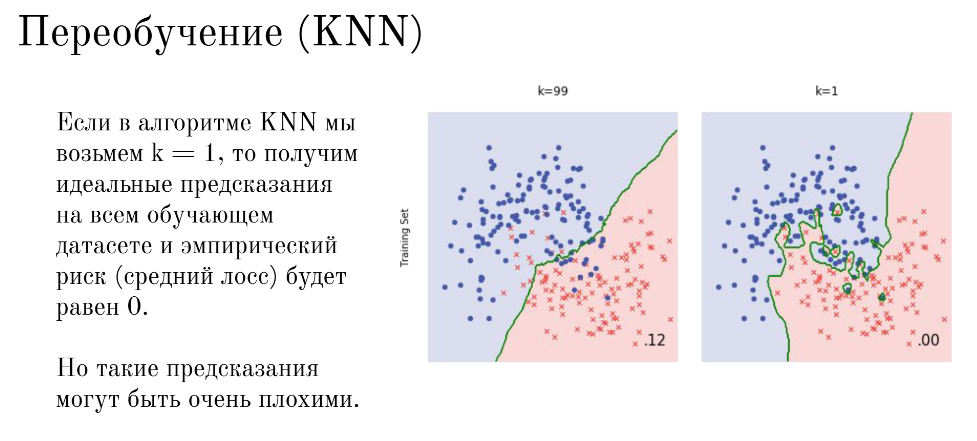

Нулевой эмпирический риск ≠ хорошая модель!

KNN с k=1 — это классический пример того, как:

Модель может идеально подстроиться под обучающие данные, но полностью потерять способность к обобщению и стать чрезвычайно чувствительной к шуму и выбросам

# Практика. Реализация алгоритма KNN

In [1]:
import numpy as np
from collections import Counter
from typing import Any, Union, List, Tuple, Optional
import math

class KNN:
    def __init__(self, k: int = 3) -> None:
        """
        Инициализация алгоритма KNN
        
        Parameters:
        k (int): количество ближайших соседей
        """
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def euclidean_distance(self, point1: Union[np.ndarray, List[Union[float, int]]], 
                          point2: Union[np.ndarray, List[Union[float, int]]]) -> float:
        """
        Вычисление евклидова расстояния между двумя точками
        
        Parameters:
        point1, point2: массивы координат точек
        
        Returns:
        float: евклидово расстояние
        """
        return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))
    
    def fit(self, X: Union[np.ndarray, List[List[Union[float, int]]]], 
            y: Union[np.ndarray, List[Any]]) -> None:
        """
        Обучение модели - просто запоминаем данные
        
        Parameters:
        X: матрица признаков (n_samples, n_features)
        y: вектор меток (n_samples)
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def predict_single(self, x: Union[np.ndarray, List[Union[float, int]]]) -> Any: 
        """
        Предсказание для одного образца
        
        Parameters:
        x: вектор признаков одного образца
        
        Returns:
        predicted_label: предсказанная метка
        """
        # Вычисляем расстояния до всех тренировочных образцов
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self.euclidean_distance(x, train_point)
            distances.append((dist, self.y_train[i]))
        
        # Сортируем по расстоянию и берем k ближайших
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Берем метки k ближайших соседей
        k_nearest_labels = [label for _, label in k_nearest]
        
        # Голосование - выбираем наиболее частую метку
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X: Union[np.ndarray, List[List[Union[float, int]]]]) -> np.array:
        """
        Предсказание для набора образцов
        
        Parameters:
        X: матрица признаков для предсказания
        
        Returns:
        predictions: массив предсказанных меток
        """
        predictions = []
        for x in X:
            predictions.append(self.predict_single(x))
        return np.array(predictions)
    
    def accuracy(self, X_test: Union[np.ndarray, List[List[Union[float, int]]]], 
                 y_test: Union[np.ndarray, List[Any]]) -> float:
        """
        Вычисление точности модели
        
        Parameters:
        X_test: тестовые данные
        y_test: истинные метки тестовых данных
        
        Returns:
        float: точность модели
        """
        predictions = self.predict(X_test)
        correct = sum(predictions == y_test)
        return correct / len(y_test)



### Пример работы реализованного KNN

In [2]:
# Пример использования
if __name__ == "__main__":
    # Признаки: [рост, вес], метки: 0 - "низкий", 1 - "высокий"
    X_train = np.array([
        [160, 55], [165, 60], [170, 65], [175, 70], [180, 75],
        [185, 80], [190, 85], [195, 90], [200, 95]
    ])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 - низкий, 1 - высокий
    
    # Тестовые данные
    X_test = np.array([
        [162, 58], [172, 68], [182, 78], [192, 88]
    ])
    y_test = np.array([0, 0, 1, 1])
    
    knn = KNN(k=3)
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(X_test)
    print("Предсказания:", predictions)
    print("Истинные метки:", y_test)
    
    accuracy = knn.accuracy(X_test, y_test)
    print(f"Точность: {accuracy:.2f}")
    
    # Предсказание для нового образца
    new_sample = [[168, 62]]
    prediction = knn.predict(new_sample)
    print(f"Предсказание для {new_sample[0]}: {'высокий' if prediction[0] == 1 else 'низкий'}")

Предсказания: [0 0 1 1]
Истинные метки: [0 0 1 1]
Точность: 1.00
Предсказание для [168, 62]: низкий


## Скачивание датасета с kaggle и обработка данных

In [4]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("thevishwakarma/iris-flower-dataset-for-knn")
print("Path to dataset files:", path)

csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

print(f"Найден файл: {csv_file}")
df = pd.read_csv(csv_file)

c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\thevishwakarma\iris-flower-dataset-for-knn\versions\1
Найден файл: C:\Users\user\.cache\kagglehub\datasets\thevishwakarma\iris-flower-dataset-for-knn\versions\1\Iris.csv


In [5]:
print(df.head())  # Первые строки
print()
print(df.info())  # Информация о колонках
print()
print(df['Species'].unique())  # Уникальные классы

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

['Iris-setosa

In [6]:
from sklearn.model_selection import train_test_split

species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species_encoded'] = df['Species'].map(species_mapping)

print(df.head())

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['species_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [7]:
df['species_encoded'].value_counts()

species_encoded
0    50
1    50
2    50
Name: count, dtype: int64

### Здесь я привожу категориальные типы данных к значениям [0, 1, 2], но в общем случае лучше использовать one-hot encoding

## Проверка работы реализованного KNN

In [8]:
knn = KNN(k=3)

knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Оценка точность
accuracy = knn.accuracy(X_test, y_test)
print(f"Точность: {accuracy:.2f}")

# Несколько примеров из тестовой выборки
for i in range(10):
    sample = X_test[i]
    actual = y_test[i]
    predicted = knn.predict_single(sample)
    print(f"Пример {i}: Предсказано {predicted}, Фактически {actual}")

Точность: 1.00
Пример 0: Предсказано 1, Фактически 1
Пример 1: Предсказано 0, Фактически 0
Пример 2: Предсказано 2, Фактически 2
Пример 3: Предсказано 1, Фактически 1
Пример 4: Предсказано 1, Фактически 1
Пример 5: Предсказано 0, Фактически 0
Пример 6: Предсказано 1, Фактически 1
Пример 7: Предсказано 2, Фактически 2
Пример 8: Предсказано 1, Фактически 1
Пример 9: Предсказано 1, Фактически 1


## Пример использования встроенного KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Модель
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)

[0 1 0 1 0 1 2 2 2 2 1 1 0 2 2 1 0 2 2 0 2 0 2 2 2 1 0 0 0 1 0 1 1 0 0 0 0
 1 2 2 1 1 2 1 0]
[0 1 0 2 0 1 2 2 2 2 1 1 0 2 1 1 0 2 2 0 2 0 2 2 2 1 0 0 0 1 0 1 1 0 0 0 0
 1 2 2 1 1 2 1 0]


## Визуализация работы встроенного KNN

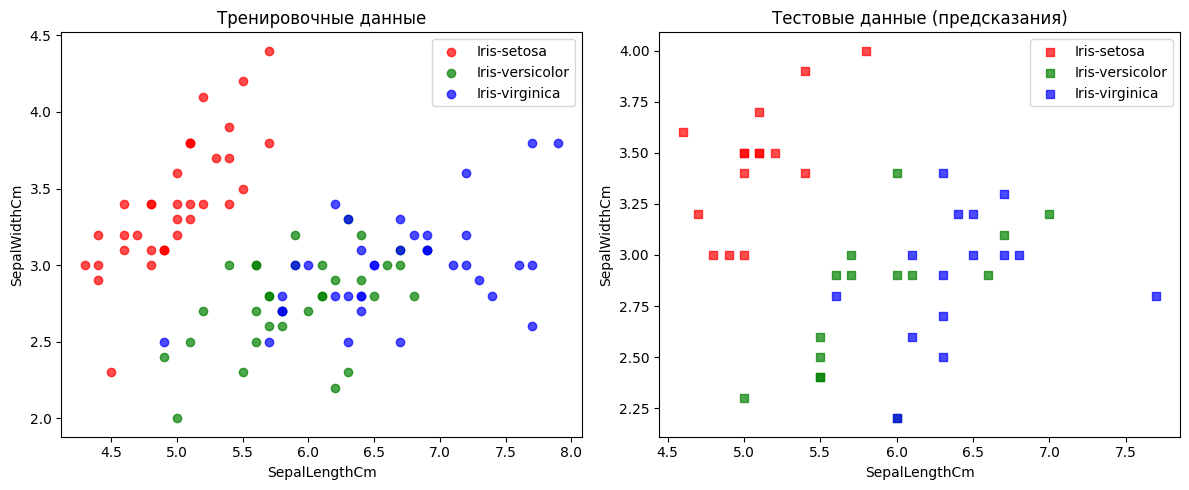

Accuracy: 0.978


In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Тренировочные данные
plt.subplot(1, 2, 1)
for i, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], 
               c=color, label=df['Species'].unique()[i], alpha=0.7)
plt.title('Тренировочные данные')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.legend()

# Тестовые данные с предсказаниями
plt.subplot(1, 2, 2)
y_pred = knn.predict(X_test)
for i, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], 
               c=color, label=df['Species'].unique()[i], alpha=0.7, marker='s')
plt.title('Тестовые данные (предсказания)')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.legend()

plt.tight_layout()
plt.show()

print(f"Accuracy: {knn.score(X_test, y_test):.3f}")

## Сравнение работы реализованного KNN и sklearn.neighbors

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# После получения предсказаний
y_pred = knn.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
models = {
    'Реализованный KNN': KNN(k=70),
    'Sklearn KNN': KNeighborsClassifier(n_neighbors=70),
}

for name, model in models.items():
    if name == 'Реализованный KNN':
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    print(name)
    print(f"Accuracy (Точность): {accuracy_score(y_test, y_pred):.4f}")
    if name == 'Реализованный KNN':
        print(f'Реализованный accuracy: {model.accuracy(X_test, y_test):.4f}')
    print(f"Precision (Точность): {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall (Полнота): {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print()

Реализованный KNN
Accuracy (Точность): 0.4889
Реализованный accuracy: 0.4889
Precision (Точность): 0.3438
Recall (Полнота): 0.4889
F1-Score: 0.3857

Sklearn KNN
Accuracy (Точность): 0.4889
Precision (Точность): 0.3438
Recall (Полнота): 0.4889
F1-Score: 0.3857



c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Тестирование KNN с разными значениями k...
k=1: реализованный KNN 1.000, sklearn 1.000
k=11: реализованный KNN 1.000, sklearn 1.000
k=21: реализованный KNN 1.000, sklearn 1.000
k=31: реализованный KNN 1.000, sklearn 1.000
k=41: реализованный KNN 1.000, sklearn 1.000
k=51: реализованный KNN 0.956, sklearn 0.956
k=61: реализованный KNN 0.956, sklearn 0.956
k=71: реализованный KNN 0.489, sklearn 0.489
k=81: реализованный KNN 0.578, sklearn 0.289
k=91: реализованный KNN 0.578, sklearn 0.289


c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

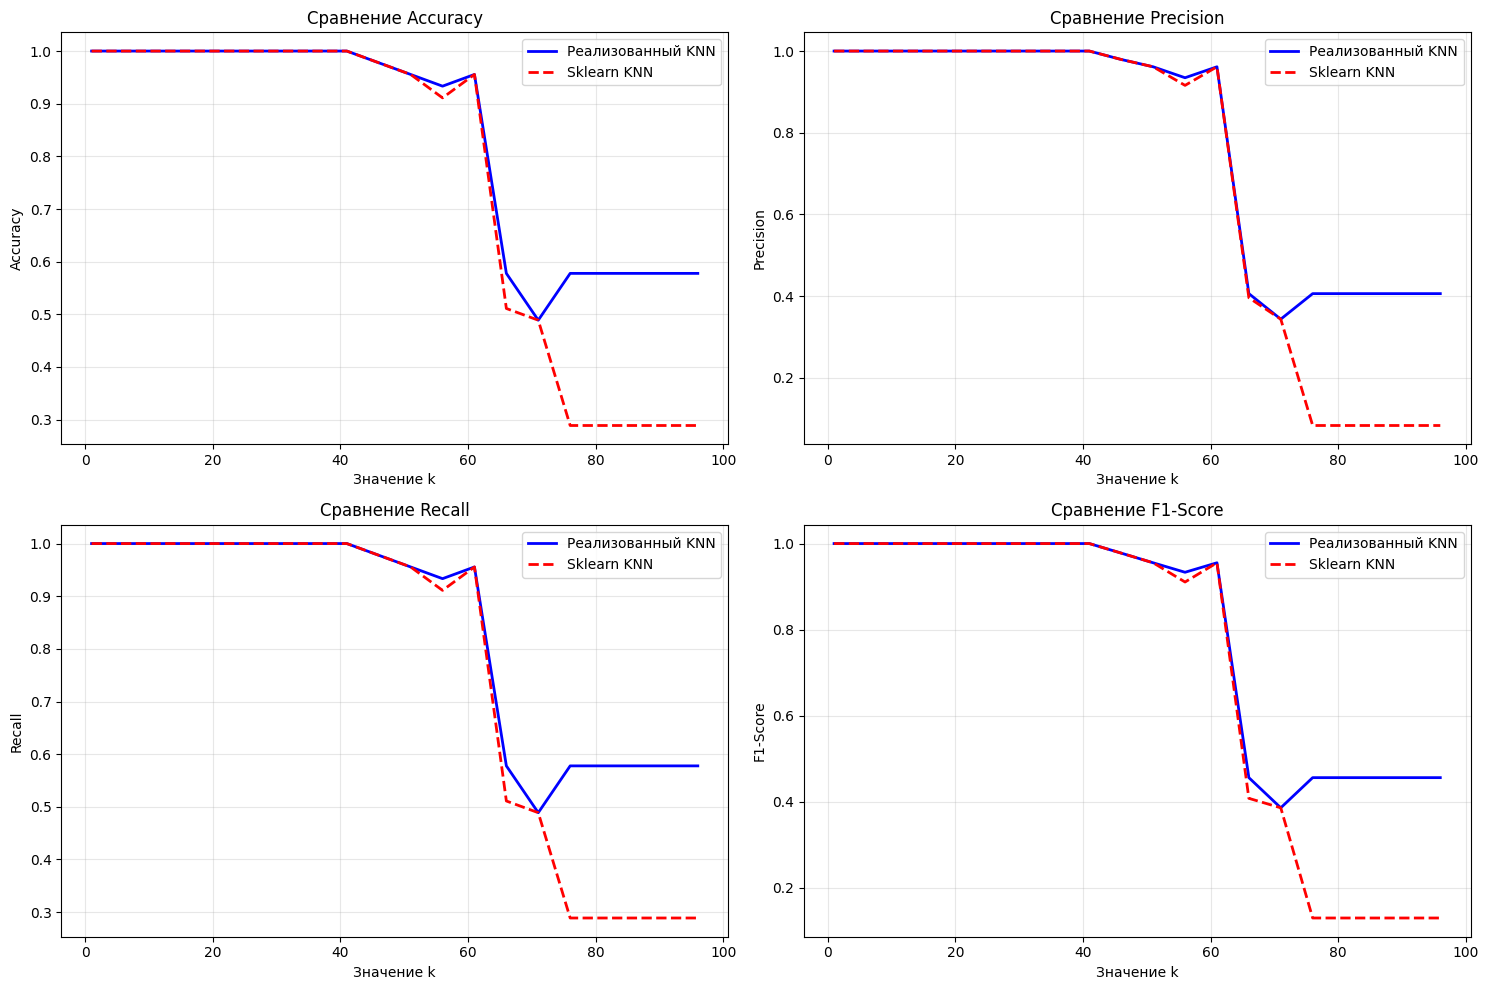

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Диапазон значений k для тестирования
k_values = range(1, 101, 5)  # от 1 до 100 с шагом 5

# Списки для хранения метрик
my_knn_accuracy = []
my_knn_precision = []
my_knn_recall = []
my_knn_f1 = []

sklearn_knn_accuracy = []
sklearn_knn_precision = []
sklearn_knn_recall = []
sklearn_knn_f1 = []

print("Тестирование KNN с разными значениями k...")

for k in k_values:
    # Твой KNN
    my_knn = KNN(k=k)
    my_knn.fit(X_train, y_train)
    y_pred_my = my_knn.predict(X_test)
    
    my_knn_accuracy.append(accuracy_score(y_test, y_pred_my))
    my_knn_precision.append(precision_score(y_test, y_pred_my, average='weighted'))
    my_knn_recall.append(recall_score(y_test, y_pred_my, average='weighted'))
    my_knn_f1.append(f1_score(y_test, y_pred_my, average='weighted'))
    
    # Sklearn KNN
    sklearn_knn = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn.fit(X_train, y_train)
    y_pred_sklearn = sklearn_knn.predict(X_test)
    
    sklearn_knn_accuracy.append(accuracy_score(y_test, y_pred_sklearn))
    sklearn_knn_precision.append(precision_score(y_test, y_pred_sklearn, average='weighted'))
    sklearn_knn_recall.append(recall_score(y_test, y_pred_sklearn, average='weighted'))
    sklearn_knn_f1.append(f1_score(y_test, y_pred_sklearn, average='weighted'))
    
    if k % 10 == 1:  # Выводим прогресс для некоторых k
        print(f"k={k}: реализованный KNN {my_knn_accuracy[-1]:.3f}, sklearn {sklearn_knn_accuracy[-1]:.3f}")

# Построение графиков
plt.figure(figsize=(15, 10))

# График 1: Accuracy
plt.subplot(2, 2, 1)
plt.plot(k_values, my_knn_accuracy, 'b-', label='Реализованный KNN', linewidth=2)
plt.plot(k_values, sklearn_knn_accuracy, 'r--', label='Sklearn KNN', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('Accuracy')
plt.title('Сравнение Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Precision
plt.subplot(2, 2, 2)
plt.plot(k_values, my_knn_precision, 'b-', label='Реализованный KNN', linewidth=2)
plt.plot(k_values, sklearn_knn_precision, 'r--', label='Sklearn KNN', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('Precision')
plt.title('Сравнение Precision')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Recall
plt.subplot(2, 2, 3)
plt.plot(k_values, my_knn_recall, 'b-', label='Реализованный KNN', linewidth=2)
plt.plot(k_values, sklearn_knn_recall, 'r--', label='Sklearn KNN', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('Recall')
plt.title('Сравнение Recall')
plt.legend()
plt.grid(True, alpha=0.3)

# График 4: F1-Score
plt.subplot(2, 2, 4)
plt.plot(k_values, my_knn_f1, 'b-', label='Реализованный KNN', linewidth=2)
plt.plot(k_values, sklearn_knn_f1, 'r--', label='Sklearn KNN', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('F1-Score')
plt.title('Сравнение F1-Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Проведём процедуру feature scaling и сравним результаты

k=1: реализованный KNN 0.978, sklearn 0.978
k=11: реализованный KNN 1.000, sklearn 1.000
k=21: реализованный KNN 1.000, sklearn 1.000
k=31: реализованный KNN 0.911, sklearn 0.911
k=41: реализованный KNN 0.844, sklearn 0.844
k=51: реализованный KNN 0.844, sklearn 0.844
k=61: реализованный KNN 0.822, sklearn 0.822
k=71: реализованный KNN 0.444, sklearn 0.444
k=81: реализованный KNN 0.467, sklearn 0.244
k=91: реализованный KNN 0.467, sklearn 0.200


c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Desktop\MIPT year 2\Инженерный практикум\Working_directory\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

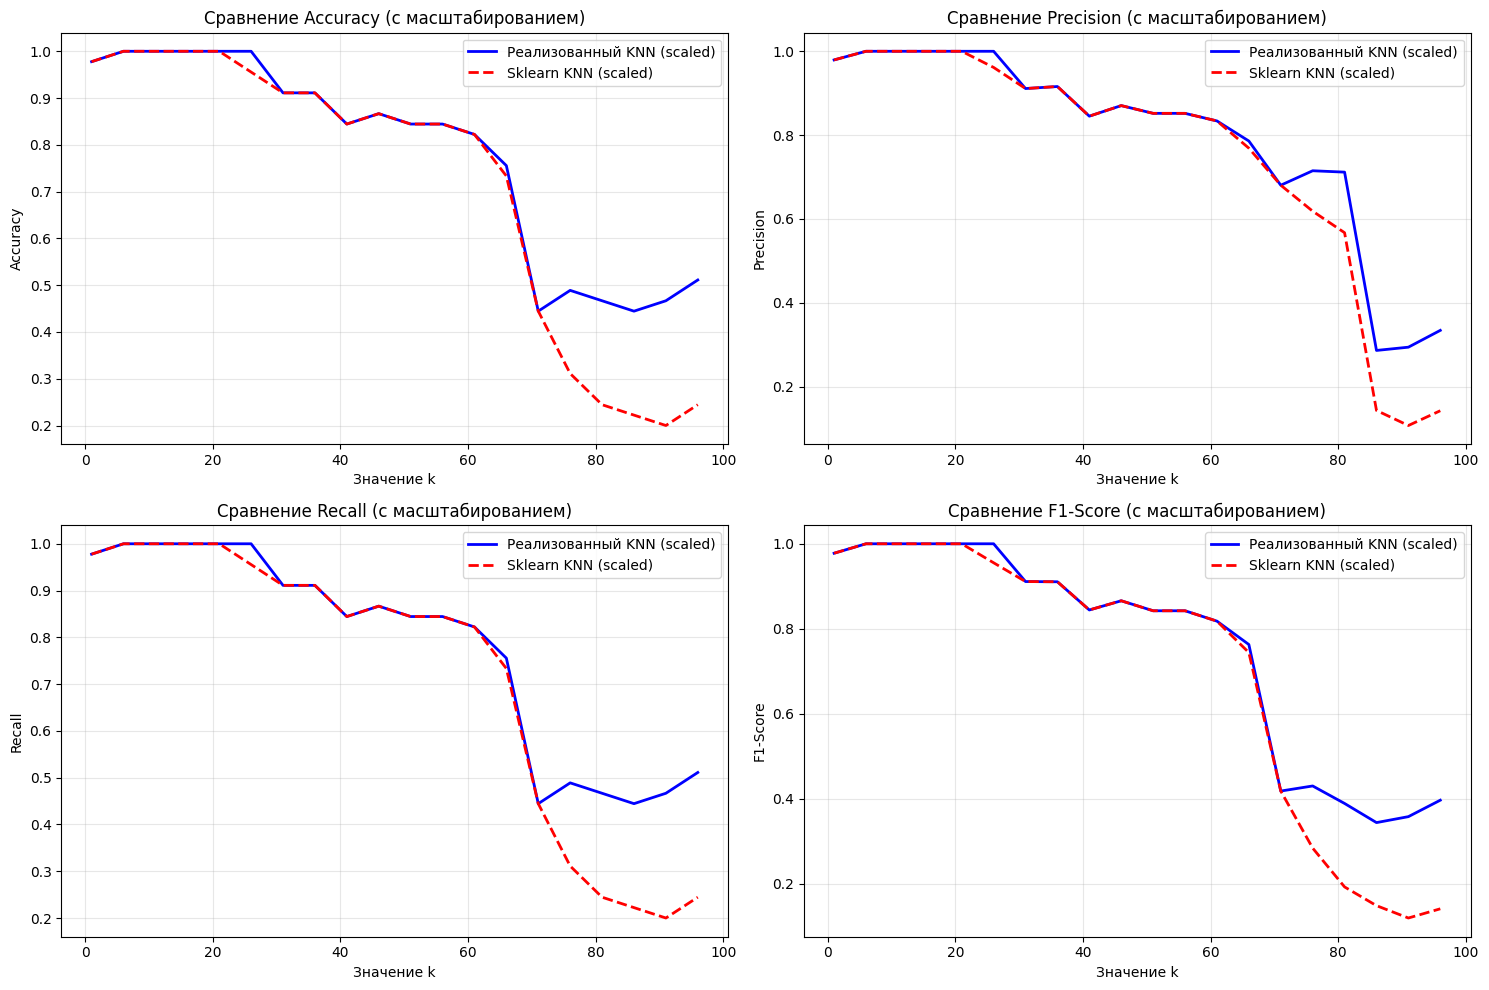


АНАЛИЗ ВЛИЯНИЯ МАСШТАБИРОВАНИЯ


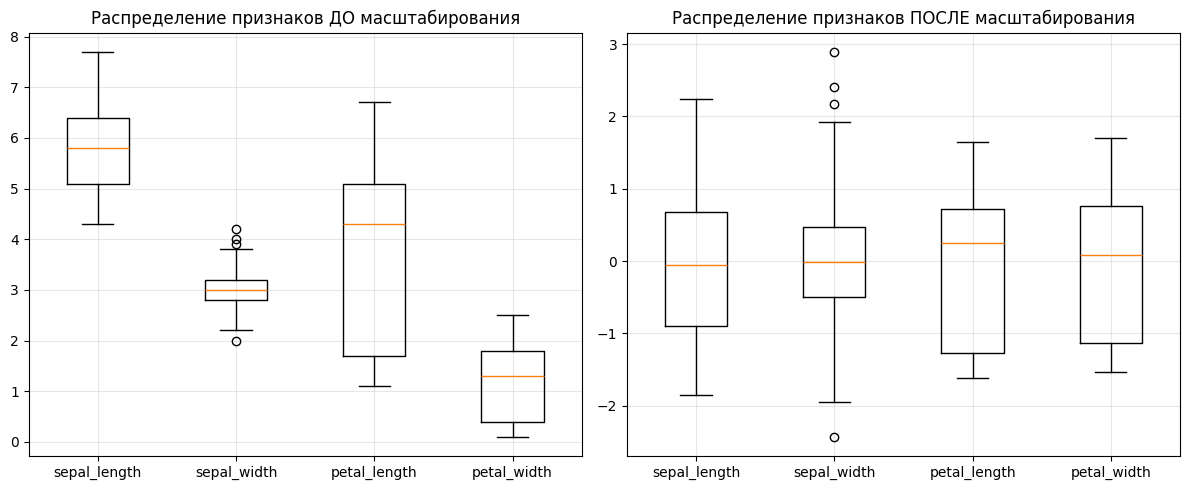

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Диапазон значений k для тестирования
k_values = range(1, 101, 5)  # от 1 до 100 с шагом 5

# Списки для хранения метрик
my_knn_accuracy = []
my_knn_precision = []
my_knn_recall = []
my_knn_f1 = []

sklearn_knn_accuracy = []
sklearn_knn_precision = []
sklearn_knn_recall = []
sklearn_knn_f1 = []

# Создаем scaler и масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in k_values:
    # Твой KNN на масштабированных данных
    my_knn = KNN(k=k)
    my_knn.fit(X_train_scaled, y_train)  # Обучаем на масштабированных данных
    y_pred_my = my_knn.predict(X_test_scaled)  # Предсказываем на масштабированных данных
    
    my_knn_accuracy.append(accuracy_score(y_test, y_pred_my))
    my_knn_precision.append(precision_score(y_test, y_pred_my, average='weighted'))
    my_knn_recall.append(recall_score(y_test, y_pred_my, average='weighted'))
    my_knn_f1.append(f1_score(y_test, y_pred_my, average='weighted'))
    
    # Sklearn KNN с пайплайном (scaling + KNN)
    sklearn_knn = Pipeline([
        ('scaler', StandardScaler()),  # Масштабирование внутри пайплайна
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    sklearn_knn.fit(X_train, y_train)  # Обучаем на исходных данных
    y_pred_sklearn = sklearn_knn.predict(X_test)  # Предсказываем на исходных данных
    
    sklearn_knn_accuracy.append(accuracy_score(y_test, y_pred_sklearn))
    sklearn_knn_precision.append(precision_score(y_test, y_pred_sklearn, average='weighted'))
    sklearn_knn_recall.append(recall_score(y_test, y_pred_sklearn, average='weighted'))
    sklearn_knn_f1.append(f1_score(y_test, y_pred_sklearn, average='weighted'))
    
    if k % 10 == 1:  # Выводим прогресс для некоторых k
        print(f"k={k}: реализованный KNN {my_knn_accuracy[-1]:.3f}, sklearn {sklearn_knn_accuracy[-1]:.3f}")

# Построение графиков
plt.figure(figsize=(15, 10))

# График 1: Accuracy
plt.subplot(2, 2, 1)
plt.plot(k_values, my_knn_accuracy, 'b-', label='Реализованный KNN (scaled)', linewidth=2)
plt.plot(k_values, sklearn_knn_accuracy, 'r--', label='Sklearn KNN (scaled)', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('Accuracy')
plt.title('Сравнение Accuracy (с масштабированием)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Precision
plt.subplot(2, 2, 2)
plt.plot(k_values, my_knn_precision, 'b-', label='Реализованный KNN (scaled)', linewidth=2)
plt.plot(k_values, sklearn_knn_precision, 'r--', label='Sklearn KNN (scaled)', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('Precision')
plt.title('Сравнение Precision (с масштабированием)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Recall
plt.subplot(2, 2, 3)
plt.plot(k_values, my_knn_recall, 'b-', label='Реализованный KNN (scaled)', linewidth=2)
plt.plot(k_values, sklearn_knn_recall, 'r--', label='Sklearn KNN (scaled)', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('Recall')
plt.title('Сравнение Recall (с масштабированием)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 4: F1-Score
plt.subplot(2, 2, 4)
plt.plot(k_values, my_knn_f1, 'b-', label='Реализованный KNN (scaled)', linewidth=2)
plt.plot(k_values, sklearn_knn_f1, 'r--', label='Sklearn KNN (scaled)', linewidth=2)
plt.xlabel('Значение k')
plt.ylabel('F1-Score')
plt.title('Сравнение F1-Score (с масштабированием)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнение с результатами без масштабирования (если есть)
print("\n" + "="*60)
print("АНАЛИЗ ВЛИЯНИЯ МАСШТАБИРОВАНИЯ")
print("="*60)

# Дополнительный анализ: сравнение распределения признаков до и после scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.title('Распределение признаков ДО масштабирования')
plt.xticks([1, 2, 3, 4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled)
plt.title('Распределение признаков ПОСЛЕ масштабирования')
plt.xticks([1, 2, 3, 4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Оценим, при каких значениях k происходит переобучение

### Используя Feature Scaling:

Анализ переобучения для разных k...
k=1: мой KNN переобучение=0.067, sklearn=0.067
k=21: мой KNN переобучение=0.073, sklearn=0.073
k=41: мой KNN переобучение=0.054, sklearn=0.054
k=61: мой KNN переобучение=0.022, sklearn=0.022
k=81: мой KNN переобучение=0.029, sklearn=0.044


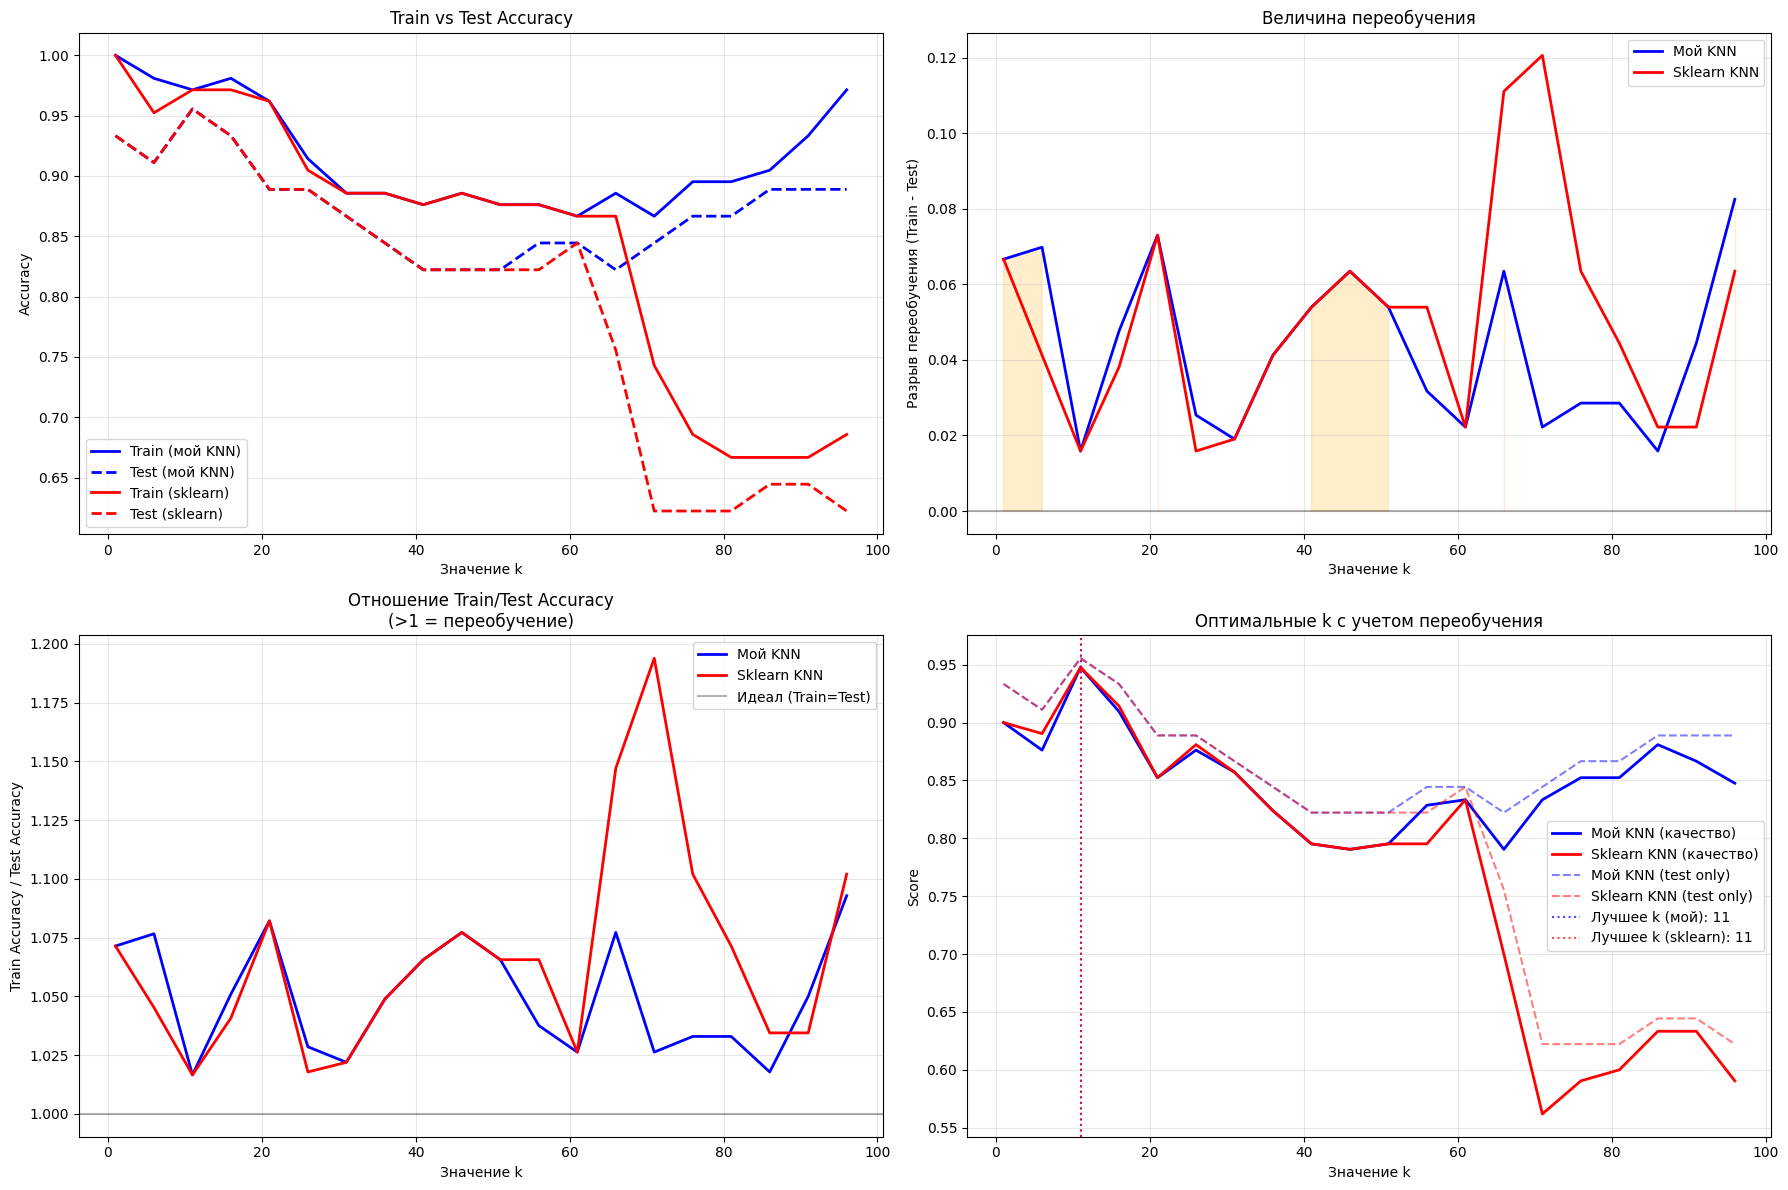


АНАЛИЗ ПЕРЕОБУЧЕНИЯ

РЕАЛИЗОВАННЫЙ KNN:
Минимальное переобучение при k=11 (разрыв: 0.0159)
Максимальная test accuracy при k=11 (accuracy: 0.9556)
Рекомендуемое k с учетом переобучения: 11

SKLEARN KNN:
Минимальное переобучение при k=11 (разрыв: 0.0159)
Максимальная test accuracy при k=11 (accuracy: 0.9556)
Рекомендуемое k с учетом переобучения: 11


In [143]:
def plot_overfitting_vs_k():
    # Анализируем широкий диапазон k
    k_range = list(range(1, 101, 5))
    
    train_accuracies_my = []
    test_accuracies_my = []
    overfitting_gap_my = []
    
    train_accuracies_sk = []
    test_accuracies_sk = []
    overfitting_gap_sk = []
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print("Анализ переобучения для разных k...")
    
    for k in k_range:
        # РЕАЛИЗОВАННЫЙ KNN
        my_knn = KNN(k=k)
        my_knn.fit(X_train_scaled, y_train)
        
        train_pred_my = my_knn.predict(X_train_scaled)
        test_pred_my = my_knn.predict(X_test_scaled)
        
        train_acc_my = accuracy_score(y_train, train_pred_my)
        test_acc_my = accuracy_score(y_test, test_pred_my)
        
        train_accuracies_my.append(train_acc_my)
        test_accuracies_my.append(test_acc_my)
        overfitting_gap_my.append(train_acc_my - test_acc_my)
        
        # SKLEARN KNN
        from sklearn.neighbors import KNeighborsClassifier
        sk_knn = KNeighborsClassifier(n_neighbors=k)
        sk_knn.fit(X_train_scaled, y_train)
        
        train_pred_sk = sk_knn.predict(X_train_scaled)
        test_pred_sk = sk_knn.predict(X_test_scaled)
        
        train_acc_sk = accuracy_score(y_train, train_pred_sk)
        test_acc_sk = accuracy_score(y_test, test_pred_sk)
        
        train_accuracies_sk.append(train_acc_sk)
        test_accuracies_sk.append(test_acc_sk)
        overfitting_gap_sk.append(train_acc_sk - test_acc_sk)
        
        if k % 20 == 1:
            print(f"k={k}: мой KNN переобучение={overfitting_gap_my[-1]:.3f}, sklearn={overfitting_gap_sk[-1]:.3f}")
    
    # Преобразуем в numpy arrays для работы с булевыми операциями
    k_range_array = np.array(k_range)
    overfitting_gap_my_array = np.array(overfitting_gap_my)
    overfitting_gap_sk_array = np.array(overfitting_gap_sk)
    train_accuracies_my_array = np.array(train_accuracies_my)
    test_accuracies_my_array = np.array(test_accuracies_my)
    train_accuracies_sk_array = np.array(train_accuracies_sk)
    test_accuracies_sk_array = np.array(test_accuracies_sk)
    
    # Строим графики
    plt.figure(figsize=(18, 12))
    
    # График 1: Accuracy на train и test
    plt.subplot(2, 2, 1)
    plt.plot(k_range, train_accuracies_my, 'b-', label='Train (мой KNN)', linewidth=2)
    plt.plot(k_range, test_accuracies_my, 'b--', label='Test (мой KNN)', linewidth=2)
    plt.plot(k_range, train_accuracies_sk, 'r-', label='Train (sklearn)', linewidth=2)
    plt.plot(k_range, test_accuracies_sk, 'r--', label='Test (sklearn)', linewidth=2)
    plt.xlabel('Значение k')
    plt.ylabel('Accuracy')
    plt.title('Train vs Test Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # График 2: Разрыв переобучения (ИСПРАВЛЕННЫЙ)
    plt.subplot(2, 2, 2)
    plt.plot(k_range, overfitting_gap_my, 'b-', label='Мой KNN', linewidth=2)
    plt.plot(k_range, overfitting_gap_sk, 'r-', label='Sklearn KNN', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel('Значение k')
    plt.ylabel('Разрыв переобучения (Train - Test)')
    plt.title('Величина переобучения')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Закрашиваем области сильного переобучения (ИСПРАВЛЕННЫЙ)
    plt.fill_between(k_range_array, overfitting_gap_my_array, 
                     where=(overfitting_gap_my_array > 0.1), 
                     color='red', alpha=0.2, label='Сильное переобучение')
    plt.fill_between(k_range_array, overfitting_gap_my_array, 
                     where=(overfitting_gap_my_array > 0.05) & (overfitting_gap_my_array <= 0.1), 
                     color='orange', alpha=0.2, label='Умеренное переобучение')
    
    # График 3: Отношение Train/Test accuracy
    plt.subplot(2, 2, 3)
    ratio_my = train_accuracies_my_array / test_accuracies_my_array
    ratio_sk = train_accuracies_sk_array / test_accuracies_sk_array
    
    plt.plot(k_range, ratio_my, 'b-', label='Мой KNN', linewidth=2)
    plt.plot(k_range, ratio_sk, 'r-', label='Sklearn KNN', linewidth=2)
    plt.axhline(y=1, color='black', linestyle='-', alpha=0.3, label='Идеал (Train=Test)')
    plt.xlabel('Значение k')
    plt.ylabel('Train Accuracy / Test Accuracy')
    plt.title('Отношение Train/Test Accuracy\n(>1 = переобучение)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # График 4: Найдем оптимальные k
    plt.subplot(2, 2, 4)
    
    # Вычисляем "качество" модели (test accuracy - штраф за переобучение)
    quality_my = test_accuracies_my_array - 0.5 * overfitting_gap_my_array
    quality_sk = test_accuracies_sk_array - 0.5 * overfitting_gap_sk_array
    
    plt.plot(k_range, quality_my, 'b-', label='Мой KNN (качество)', linewidth=2)
    plt.plot(k_range, quality_sk, 'r-', label='Sklearn KNN (качество)', linewidth=2)
    plt.plot(k_range, test_accuracies_my, 'b--', alpha=0.5, label='Мой KNN (test only)')
    plt.plot(k_range, test_accuracies_sk, 'r--', alpha=0.5, label='Sklearn KNN (test only)')
    
    # Отмечаем лучшие k
    best_k_my = k_range_array[np.argmax(quality_my)]
    best_k_sk = k_range_array[np.argmax(quality_sk)]
    
    plt.axvline(x=best_k_my, color='blue', linestyle=':', alpha=0.7, label=f'Лучшее k (мой): {best_k_my}')
    plt.axvline(x=best_k_sk, color='red', linestyle=':', alpha=0.7, label=f'Лучшее k (sklearn): {best_k_sk}')
    
    plt.xlabel('Значение k')
    plt.ylabel('Score')
    plt.title('Оптимальные k с учетом переобучения')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ результатов
    print("\n" + "="*60)
    print("АНАЛИЗ ПЕРЕОБУЧЕНИЯ")
    print("="*60)
    
    print(f"\nРЕАЛИЗОВАННЫЙ KNN:")
    min_overfit_k_my = k_range_array[np.argmin(overfitting_gap_my_array)]
    max_test_k_my = k_range_array[np.argmax(test_accuracies_my_array)]
    print(f"Минимальное переобучение при k={min_overfit_k_my} (разрыв: {np.min(overfitting_gap_my_array):.4f})")
    print(f"Максимальная test accuracy при k={max_test_k_my} (accuracy: {np.max(test_accuracies_my_array):.4f})")
    print(f"Рекомендуемое k с учетом переобучения: {best_k_my}")
    
    print(f"\nSKLEARN KNN:")
    min_overfit_k_sk = k_range_array[np.argmin(overfitting_gap_sk_array)]
    max_test_k_sk = k_range_array[np.argmax(test_accuracies_sk_array)]
    print(f"Минимальное переобучение при k={min_overfit_k_sk} (разрыв: {np.min(overfitting_gap_sk_array):.4f})")
    print(f"Максимальная test accuracy при k={max_test_k_sk} (accuracy: {np.max(test_accuracies_sk_array):.4f})")
    print(f"Рекомендуемое k с учетом переобучения: {best_k_sk}")

# Запускаем анализ зависимости от k
plot_overfitting_vs_k()

### Без Feature Scaling:

Анализ переобучения для разных k (БЕЗ масштабирования)...
k=1: мой KNN переобучение=0.067, sklearn=0.067
k=21: мой KNN переобучение=0.006, sklearn=0.006
k=41: мой KNN переобучение=0.025, sklearn=0.025
k=61: мой KNN переобучение=-0.003, sklearn=-0.003
k=81: мой KNN переобучение=0.067, sklearn=-0.010


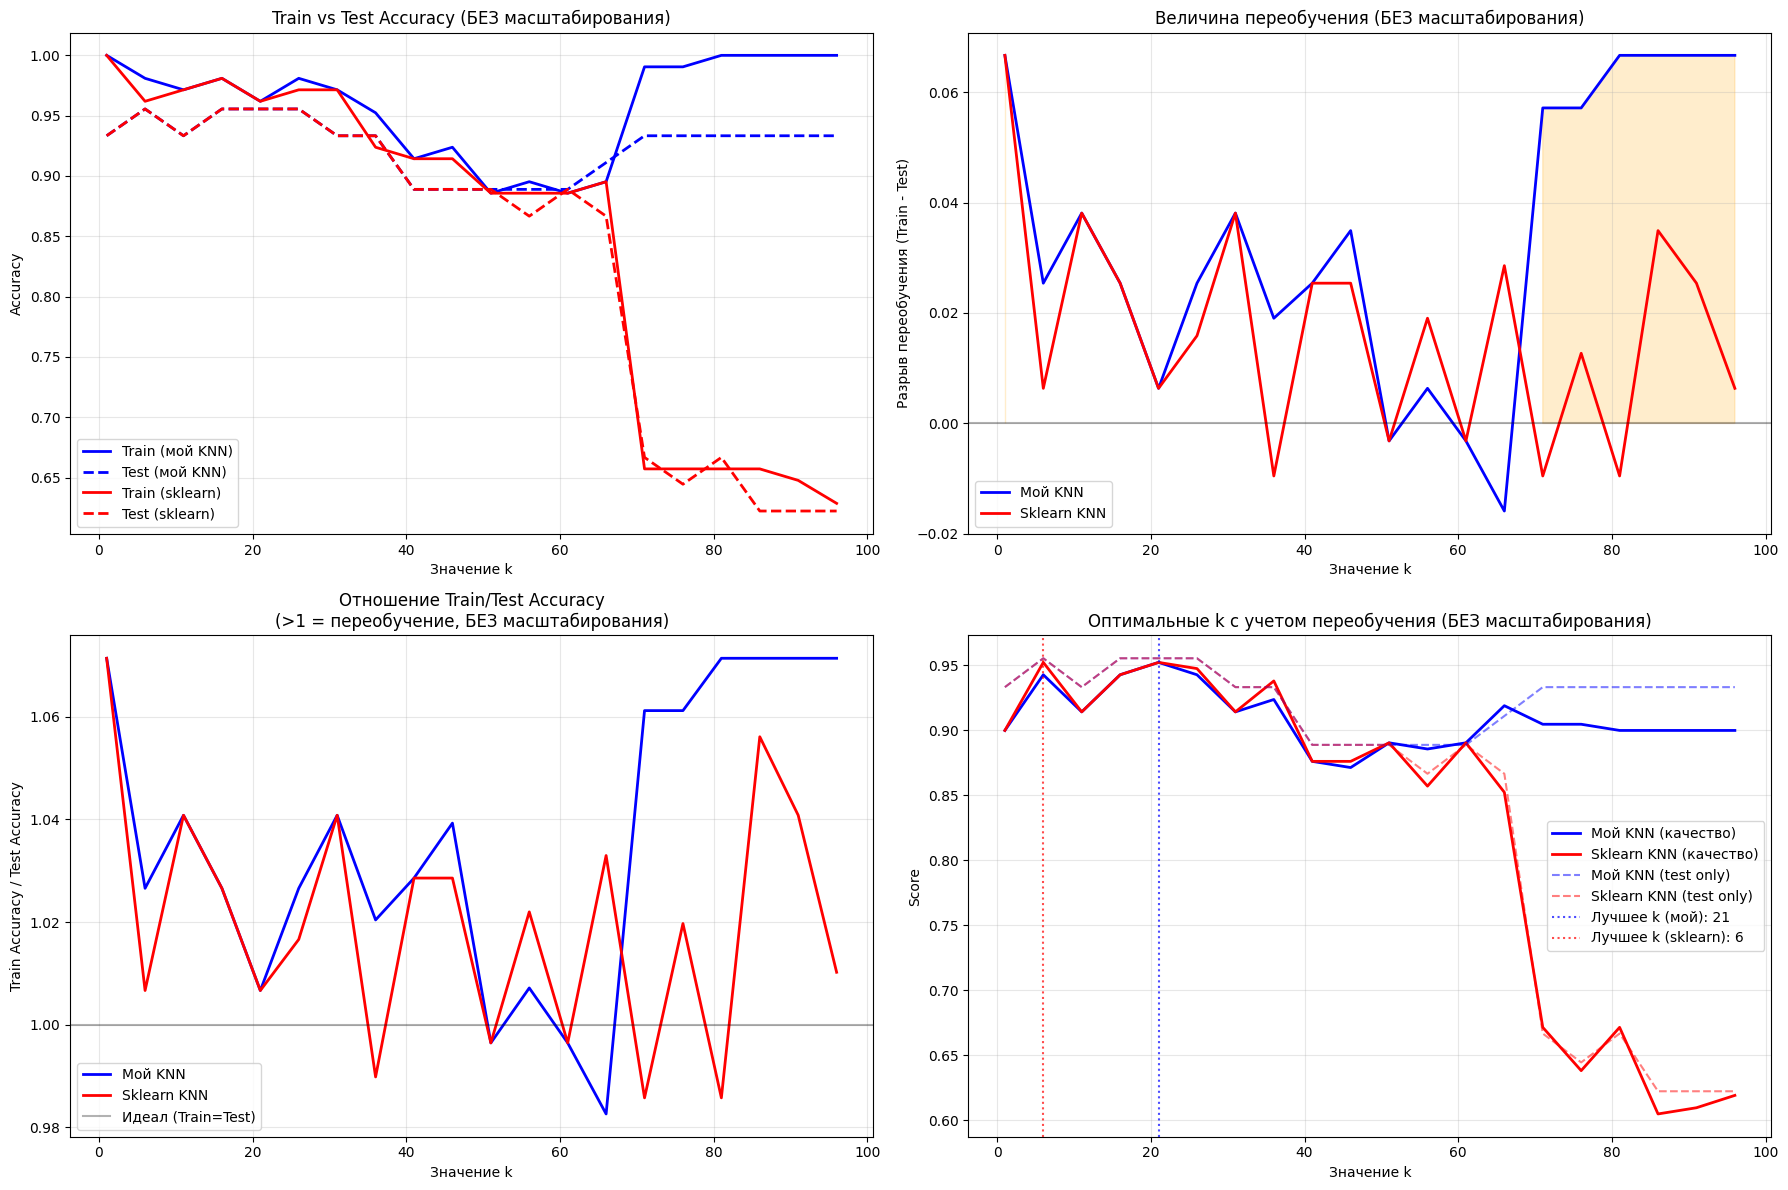


АНАЛИЗ ПЕРЕОБУЧЕНИЯ (БЕЗ МАСШТАБИРОВАНИЯ)

РЕАЛИЗОВАННЫЙ KNN:
Минимальное переобучение при k=66 (разрыв: -0.0159)
Максимальная test accuracy при k=6 (accuracy: 0.9556)
Рекомендуемое k с учетом переобучения: 21

SKLEARN KNN:
Минимальное переобучение при k=36 (разрыв: -0.0095)
Максимальная test accuracy при k=6 (accuracy: 0.9556)
Рекомендуемое k с учетом переобучения: 6


In [144]:
def plot_overfitting_vs_k_no_scaling():
    # Анализируем широкий диапазон k
    k_range = list(range(1, 101, 5))
    
    train_accuracies_my = []
    test_accuracies_my = []
    overfitting_gap_my = []
    
    train_accuracies_sk = []
    test_accuracies_sk = []
    overfitting_gap_sk = []
    
    # НЕ делаем масштабирование - используем исходные данные
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print("Анализ переобучения для разных k (БЕЗ масштабирования)...")
    
    for k in k_range:
        # РЕАЛИЗОВАННЫЙ KNN
        my_knn = KNN(k=k)
        my_knn.fit(X_train_raw, y_train)
        
        train_pred_my = my_knn.predict(X_train_raw)
        test_pred_my = my_knn.predict(X_test_raw)
        
        train_acc_my = accuracy_score(y_train, train_pred_my)
        test_acc_my = accuracy_score(y_test, test_pred_my)
        
        train_accuracies_my.append(train_acc_my)
        test_accuracies_my.append(test_acc_my)
        overfitting_gap_my.append(train_acc_my - test_acc_my)
        
        # SKLEARN KNN
        from sklearn.neighbors import KNeighborsClassifier
        sk_knn = KNeighborsClassifier(n_neighbors=k)
        sk_knn.fit(X_train_raw, y_train)
        
        train_pred_sk = sk_knn.predict(X_train_raw)
        test_pred_sk = sk_knn.predict(X_test_raw)
        
        train_acc_sk = accuracy_score(y_train, train_pred_sk)
        test_acc_sk = accuracy_score(y_test, test_pred_sk)
        
        train_accuracies_sk.append(train_acc_sk)
        test_accuracies_sk.append(test_acc_sk)
        overfitting_gap_sk.append(train_acc_sk - test_acc_sk)
        
        if k % 20 == 1:
            print(f"k={k}: мой KNN переобучение={overfitting_gap_my[-1]:.3f}, sklearn={overfitting_gap_sk[-1]:.3f}")
    
    # Преобразуем в numpy arrays для работы с булевыми операциями
    k_range_array = np.array(k_range)
    overfitting_gap_my_array = np.array(overfitting_gap_my)
    overfitting_gap_sk_array = np.array(overfitting_gap_sk)
    train_accuracies_my_array = np.array(train_accuracies_my)
    test_accuracies_my_array = np.array(test_accuracies_my)
    train_accuracies_sk_array = np.array(train_accuracies_sk)
    test_accuracies_sk_array = np.array(test_accuracies_sk)
    
    # Строим графики
    plt.figure(figsize=(18, 12))
    
    # График 1: Accuracy на train и test
    plt.subplot(2, 2, 1)
    plt.plot(k_range, train_accuracies_my, 'b-', label='Train (мой KNN)', linewidth=2)
    plt.plot(k_range, test_accuracies_my, 'b--', label='Test (мой KNN)', linewidth=2)
    plt.plot(k_range, train_accuracies_sk, 'r-', label='Train (sklearn)', linewidth=2)
    plt.plot(k_range, test_accuracies_sk, 'r--', label='Test (sklearn)', linewidth=2)
    plt.xlabel('Значение k')
    plt.ylabel('Accuracy')
    plt.title('Train vs Test Accuracy (БЕЗ масштабирования)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # График 2: Разрыв переобучения
    plt.subplot(2, 2, 2)
    plt.plot(k_range, overfitting_gap_my, 'b-', label='Мой KNN', linewidth=2)
    plt.plot(k_range, overfitting_gap_sk, 'r-', label='Sklearn KNN', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel('Значение k')
    plt.ylabel('Разрыв переобучения (Train - Test)')
    plt.title('Величина переобучения (БЕЗ масштабирования)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Закрашиваем области сильного переобучения
    plt.fill_between(k_range_array, overfitting_gap_my_array, 
                     where=(overfitting_gap_my_array > 0.1), 
                     color='red', alpha=0.2, label='Сильное переобучение')
    plt.fill_between(k_range_array, overfitting_gap_my_array, 
                     where=(overfitting_gap_my_array > 0.05) & (overfitting_gap_my_array <= 0.1), 
                     color='orange', alpha=0.2, label='Умеренное переобучение')
    
    # График 3: Отношение Train/Test accuracy
    plt.subplot(2, 2, 3)
    ratio_my = train_accuracies_my_array / test_accuracies_my_array
    ratio_sk = train_accuracies_sk_array / test_accuracies_sk_array
    
    plt.plot(k_range, ratio_my, 'b-', label='Мой KNN', linewidth=2)
    plt.plot(k_range, ratio_sk, 'r-', label='Sklearn KNN', linewidth=2)
    plt.axhline(y=1, color='black', linestyle='-', alpha=0.3, label='Идеал (Train=Test)')
    plt.xlabel('Значение k')
    plt.ylabel('Train Accuracy / Test Accuracy')
    plt.title('Отношение Train/Test Accuracy\n(>1 = переобучение, БЕЗ масштабирования)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # График 4: Найдем оптимальные k
    plt.subplot(2, 2, 4)
    
    # Вычисляем "качество" модели (test accuracy - штраф за переобучение)
    quality_my = test_accuracies_my_array - 0.5 * overfitting_gap_my_array
    quality_sk = test_accuracies_sk_array - 0.5 * overfitting_gap_sk_array
    
    plt.plot(k_range, quality_my, 'b-', label='Мой KNN (качество)', linewidth=2)
    plt.plot(k_range, quality_sk, 'r-', label='Sklearn KNN (качество)', linewidth=2)
    plt.plot(k_range, test_accuracies_my, 'b--', alpha=0.5, label='Мой KNN (test only)')
    plt.plot(k_range, test_accuracies_sk, 'r--', alpha=0.5, label='Sklearn KNN (test only)')
    
    # Отмечаем лучшие k
    best_k_my = k_range_array[np.argmax(quality_my)]
    best_k_sk = k_range_array[np.argmax(quality_sk)]
    
    plt.axvline(x=best_k_my, color='blue', linestyle=':', alpha=0.7, label=f'Лучшее k (мой): {best_k_my}')
    plt.axvline(x=best_k_sk, color='red', linestyle=':', alpha=0.7, label=f'Лучшее k (sklearn): {best_k_sk}')
    
    plt.xlabel('Значение k')
    plt.ylabel('Score')
    plt.title('Оптимальные k с учетом переобучения (БЕЗ масштабирования)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Анализ результатов
    print("\n" + "="*70)
    print("АНАЛИЗ ПЕРЕОБУЧЕНИЯ (БЕЗ МАСШТАБИРОВАНИЯ)")
    print("="*70)
    
    print(f"\nРЕАЛИЗОВАННЫЙ KNN:")
    min_overfit_k_my = k_range_array[np.argmin(overfitting_gap_my_array)]
    max_test_k_my = k_range_array[np.argmax(test_accuracies_my_array)]
    print(f"Минимальное переобучение при k={min_overfit_k_my} (разрыв: {np.min(overfitting_gap_my_array):.4f})")
    print(f"Максимальная test accuracy при k={max_test_k_my} (accuracy: {np.max(test_accuracies_my_array):.4f})")
    print(f"Рекомендуемое k с учетом переобучения: {best_k_my}")
    
    print(f"\nSKLEARN KNN:")
    min_overfit_k_sk = k_range_array[np.argmin(overfitting_gap_sk_array)]
    max_test_k_sk = k_range_array[np.argmax(test_accuracies_sk_array)]
    print(f"Минимальное переобучение при k={min_overfit_k_sk} (разрыв: {np.min(overfitting_gap_sk_array):.4f})")
    print(f"Максимальная test accuracy при k={max_test_k_sk} (accuracy: {np.max(test_accuracies_sk_array):.4f})")
    print(f"Рекомендуемое k с учетом переобучения: {best_k_sk}")

# Запускаем анализ зависимости от k БЕЗ масштабирования
plot_overfitting_vs_k_no_scaling()